# Structuring Machine Learning Projects

[deeplearning.ai](https://www.coursera.org/learn/machine-learning-projects/home/week/1)

## Learning Objectives
 - Understand why `Machine Learning strategy` is important
 - Apply `satisficing` and `optimizing` metrics to set up your goal for ML projects
 - Choose a correct train/dev/test `split` of your dataset
 - Understand how to define `human-level` performance
 - Use human-level perform to define your key priorities in ML projects
 - Take the correct `ML Strategic` decision based on observations of performances and dataset


# 1. Introduction to ML Strategy

### 1.1 Why ML Strategy


### 1.2 LectureOrthogonalization

> Independence

__Accuracy Problem__
 - In training set >> bigger network or better optimisation
 - In development set >> regularizagion or bigger training set
 - In test set >> bigger development set
 - In real-world >> train/dev/test re-split or change cost function

# 2. Setting up your goal

### 2.1 Single number evaluation metric


### 2.2 Satisficing and Optimizing metric

### 2.3 Train/dev/test distributions

### 2.4 Size of the dev and test sets


### 2.5 When to change dev/test sets and metrics


# 3. Comparing to human-level performance

### 3.1 Why human-level performance?

### 3.2 Avoidable bias

### 3.3 Understanding human-level performance

### 3.4 Surpassing human-level performance

### 3.4 Improving your model performance




# Summary

![summary.png](summary.png)

# Example

### Code: 
 - [Deep Learning Tutorial for Beginners, Datai](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners/)

### Data :
 - [Sign Language Digits Dataset, Arda Mavi](https://www.kaggle.com/ardamavi/sign-language-digits-dataset/kernels)

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Load data set

In [101]:
X = np.load('data/X.npy')
y = np.load('data/Y.npy')

# Select only ones and zeros

In [102]:
X_zero, y_zero, X_one, y_one = X[204:409], np.zeros(205), X[822:1027], np.ones(205)

# Draw first and last pictures for ones and zeros

(-0.5, 63.5, 63.5, -0.5)

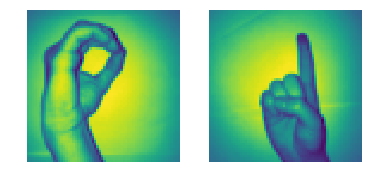

In [103]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X_zero[0].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_one[0].reshape(img_size, img_size))
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

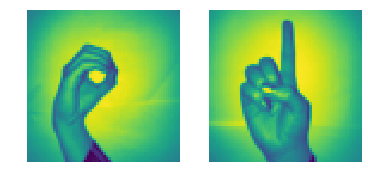

In [104]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X_zero[-1].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X_one[-1].reshape(img_size, img_size))
plt.axis('off')

# Reduce and construct dataset

In [105]:
r =50
X01 = np.concatenate((X_zero[:r], X_one[:r]))
y01 = np.concatenate((y_zero[:r], y_one[:r])).reshape(-1,1)

In [106]:
X01.shape

(100, 64, 64)

In [107]:
y01.shape

(100, 1)

In [108]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X01, y01, test_size=0.15, random_state=1)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [109]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])

print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (85, 4096)
X test flatten (15, 4096)


In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_flatten = sc.fit_transform(X_train_flatten)
X_test_flatten = sc.transform(X_test_flatten)

In [111]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [112]:
clf = Sequential([
    Dense(units=2, kernel_initializer='uniform', input_dim=4096, activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

In [113]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 2)                 8194      
_________________________________________________________________
dense_299 (Dense)            (None, 1)                 3         
Total params: 8,197
Trainable params: 8,197
Non-trainable params: 0
_________________________________________________________________


In [114]:
4096 * 4 + 4, 4 * 1 + 1

(16388, 5)

In [115]:
clf.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
clf.fit(X_train_flatten, Y_train, batch_size=5, epochs=2)

Epoch 1/2
85/85 [==============================] - 3s 33ms/step - loss: 0.6856 - acc: 0.5412
Epoch 2/2
85/85 [==============================] - 0s 474us/step - loss: 0.6668 - acc: 0.5412


In [117]:
score = clf.evaluate(X_test_flatten, Y_test, batch_size=5)
print('\nAnd the Score is ', score[1] * 100, '%')

15/15 [==============================] - 1s 76ms/step

And the Score is  26.666667064030964 %


## Try a bigger network

In [118]:
clf = Sequential([
    Dense(units=40, kernel_initializer='uniform', input_dim=4096, activation='relu'),
    Dense(units=40, kernel_initializer='uniform', input_dim=4096, activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

clf.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

clf.fit(X_train_flatten, Y_train, batch_size=5, epochs=2)

score = clf.evaluate(X_test_flatten, Y_test, batch_size=5)
print('\nAnd the Score is ', score[1] * 100, '%')

Epoch 1/2
85/85 [==============================] - 3s 34ms/step - loss: 0.6926 - acc: 0.5294
Epoch 2/2
15/15 [==============================] - 1s 81ms/step

And the Score is  46.66666785875957 %


# Add Regularization

In [119]:
clf = Sequential([
    Dense(units=40, kernel_initializer='uniform', input_dim=4096, activation='relu'),
    Dropout(0.25),
    Dense(units=10, kernel_initializer='uniform', input_dim=4096, activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

clf.fit(X_train_flatten, Y_train, batch_size=5, epochs=2)

score = clf.evaluate(X_test_flatten, Y_test, batch_size=5)
print('\nAnd the Score is ', score[1] * 100, '%')

Epoch 1/2
85/85 [==============================] - 3s 36ms/step - loss: 0.6798 - acc: 0.6588
Epoch 2/2
15/15 [==============================] - 1s 84ms/step

And the Score is  86.66666746139526 %


## Create Function That Constructs A Neural Network

In [124]:
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4096))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 3)
accuracies = cross_val_score(estimator = classifier, X = X_train_flatten, y = Y_train, cv = 2)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))


Epoch 1/3
42/42 [==============================] - 4s 84ms/step - loss: 0.6932 - acc: 0.5238
Epoch 2/3
42/42 [==============================] - 0s 176us/step - loss: 0.6905 - acc: 0.8810
Epoch 3/3
43/43 [==============================] - 2s 36ms/step
Epoch 1/3
43/43 [==============================] - 3s 79ms/step - loss: 0.6931 - acc: 0.5349
Epoch 2/3
43/43 [==============================] - 0s 171us/step - loss: 0.6925 - acc: 0.9070
Epoch 3/3
42/42 [==============================] - 1s 35ms/step
Accuracy mean: 0.7643964569830023
Accuracy variance: 0.026301216049447795


### Create Function That Constructs A Neural Network

In [125]:
def build_model(optimizer, learning_rate, activation, dropout_rate, initilizer,num_unit):
    #keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(num_unit, kernel_initializer=initilizer, activation=activation, input_shape=(4096,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initilizer, activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    
    model.compile(optimizer = optimizer(lr=learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

### Create Hyperparameter Search Space

In [135]:
# [:1] is for testing
batch_size = [20, 50, 100][:1]
epochs = [1, 20, 50][:1]
initilizer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]
learning_rate = [0.1, 0.01, 0.001]
dropout_rate = [0.1, 0.2, 0.3, 0.4]
num_unit = [4, 8, 16]

activation = ['relu', 'tanh', 'sigmoid', 'linear'][:1]
optimizer = ['sgd','rmsprop', 'adam']

In [136]:
# parameters is a dict with all values
parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  dropout_rate = dropout_rate,
                  num_unit = num_unit,
                  initilizer = initilizer,
                  learning_rate = learning_rate,
                  activation = activation,
                  optimizer = optimizer)

### Conduct Grid Search

In [137]:
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=build_model, verbose=0)
models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

### Find Best Model’s Hyperparameters

In [138]:
best_model = models.fit(X_train_flatten, Y_train)
print('Best model :')
print(best_model.best_params_)

Best model :
{'activation': 'relu', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 1, 'initilizer': 'lecun_uniform', 'learning_rate': 0.001, 'num_unit': 16, 'optimizer': 'rmsprop'}
